In [6]:
import numpy as np
import sys
import os
sys.path.append('..')
from Enviroments.Continuous_Env import DroneEnv
from Algs.agent import  Agent
import time
import torch
from collections import deque

enc_path = "enc.pth"

In [14]:
runtime = 10
dt = 0.001
env = DroneEnv(runtime = runtime, dt = dt)
max_t = int(runtime/dt)
n_episodes = 5000
obs = env.reset()
state_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]
hidden_size = 256
batch_size = 256
# model_type = 'LSTM'
model_type = 'Transformer'
enc_path = model_type + ".pth"
print(state_size, action_size)
print(enc_path)

21 4
Transformer.pth


C:\Anaconda3\envs\research\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [8]:

# states = obs.reshape((1,-1))
# print(states.shape)
# print(states.reshape((3,-1)))

Episode 1 (13 sec)  -- 	Mean Loss =15.5 -- 	 Avg: 15.5
Episode 2 (13 sec)  -- 	Mean Loss =10.5 -- 	 Avg: 13.0
Episode 3 (13 sec)  -- 	Mean Loss =7.1 -- 	 Avg: 11.1
Episode 4 (13 sec)  -- 	Mean Loss =5.1 -- 	 Avg: 9.6
Episode 5 (13 sec)  -- 	Mean Loss =3.5 -- 	 Avg: 8.4

Environment SOLVED in 0 episodes!	Moving Average =0.0 over last 0.08363368585705758 episodes


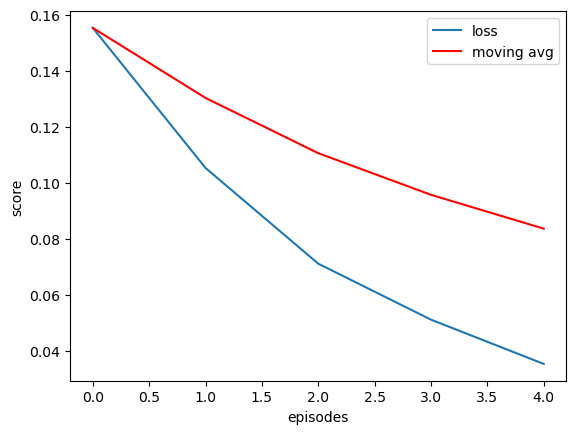

In [13]:
import matplotlib.pyplot as plt

def forcast(n_episodes=5000, max_t=10000, best_score = 1000, consec_episodes = 5, print_every=100,solved_score = 1e5, train_mode=True,
         enc_path='enc.pth', critic_path='critic.pth'):

    mean_loss = []  # list of mean scores from each episode
    loss_window = deque(maxlen=consec_episodes)  # mean scores from most recent episodes
    avgs = []  # list of averages

    for i_episode in range(1, n_episodes + 1):

        agent.step(max_t)

        if i_episode % print_every == 0:
            start_time = time.time()
            loss = agent.test(max_t)
            duration = time.time() - start_time
            mean_loss.append(np.mean(loss))  # save mean score for the episode
            loss_window.append(mean_loss[-1])  # save mean score to window
            avgs.append(np.mean(loss_window))  # save moving average
            print('\rEpisode {} ({} sec)  -- \tMean Loss ={:.1f} -- \t Avg: {:.1f}'.format( \
                i_episode, round(duration), mean_loss[-1]*100, avgs[-1]*100,))


        if avgs[-1] <= best_score and i_episode >= consec_episodes:
            print('\nEnvironment SOLVED in {} episodes!\tMoving Average ={:.1f} over last {} episodes'.format( \
                i_episode - consec_episodes, mean_loss[-1], avgs[-1], consec_episodes))
            if train_mode:
                torch.save({'model_state_dict': agent.model.state_dict(),
                            'optimizer_state_dict': agent.optimizer.state_dict()}, enc_path)

            best_score = avgs[-1]
            # if best_score < solved_score:
            #     break

    return mean_loss, avgs

# run the training loop

agent = Agent(state_size=state_size,hidden_size=hidden_size, random_seed=42,env = env,batch_size = batch_size,model_type=model_type)
losses, avgs = forcast(n_episodes=n_episodes, max_t=max_t, solved_score=0, print_every=10,enc_path=enc_path)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(losses)), losses, label='loss')
plt.plot(np.arange(len(losses)), avgs, c='r', label='moving avg')
plt.legend()
plt.ylabel('score')
plt.xlabel('episodes')
plt.show()

In [10]:
# import torch.nn as nn
# transformer_model = nn.Transformer(d_model=512, nhead=8, num_encoder_layers=6, num_decoder_layers=6, dim_feedforward=2048,)
#
# out = transformer_model(src, tgt)
# print(out)

# Atten = nn.MultiheadAttention(embed_dim = 32, num_heads =4)
# x = torch.rand((32,))
# Atten.forward(x)